# Project  -  Rainfall Prediction using Decision and Random Forest

## Import data and split them into Training and validation set

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
#import random
#random.seed()

XData = np.genfromtxt("data/X_train.txt",delimiter=None)
YData = np.genfromtxt("data/Y_train.txt",delimiter=None)
Xtest = np.genfromtxt("data/X_test.txt" ,delimiter=None)



Xtrain, Ytrain = XData[0:90000]    , YData[0:90000]     # get features & target
Xvalid, Yvalid = XData[90000:100000], YData[90000:100000] # get features & target

Xtrain,_ = ml.transforms.rescale(Xtrain) # works much better on rescaled data
Xvalid,_ = ml.transforms.rescale(Xvalid) # works much better on rescaled data

Xtest,_  = ml.transforms.rescale(Xtest)  # works much better on rescaled data

# 1.Decision Tree

## Calculate MSE in different maxDepth ( i )

training   MSE error:
[3.6689745647209877, 3.5657315160063536, 3.5257942828167463, 3.5045276010548645, 3.467224271233983, 3.4217712630747967, 3.33686792013793, 3.1702387775898764, 3.0445773759787387, 2.92898456845634, 2.744175744858637, 2.5326514739680475, 2.284882095374879, 2.060703918566663, 1.8664269156168203, 1.6710394697696365]
validation MSE error:
[3.873953483456791, 3.7653527711442547, 3.7316633760853968, 3.706350979993167, 3.8337772511330885, 4.401632321427804, 3.8951011665752877, 3.9870542302248904, 4.09021613922177, 4.914005408418812, 4.839489463256253, 4.898651029412779, 5.770648824348976, 6.20141661887959, 6.570089494838368, 7.853443409132111]


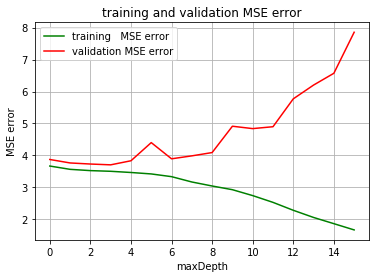

In [34]:
mse_train = []
mse_valid = []
x_axis = []
for i in range (0,16):
    x_axis.append(i)
    dtlearner = ml.dtree.treeRegress(Xtrain, Ytrain, maxDepth = i)
    #ytrainhat = dtlearner.predict(Xtrain) 
    mse_train.append( dtlearner.mse(Xtrain, Ytrain) )
        
    #yvalidhat = dtlearner.predict(Xvalid) 
    mse_valid.append( dtlearner.mse(Xvalid, Yvalid) )
    
plt.plot(x_axis, mse_train, 'g-', label='training   MSE error');
plt.plot(x_axis, mse_valid, 'r-', label='validation MSE error');
plt.xlabel("maxDepth")
plt.ylabel("MSE error")
plt.title('training and validation MSE error')
plt.grid(True)
plt.legend()

print ('training   MSE error:')
print( mse_train)

print ('validation MSE error:')
print (mse_valid)

### complexity increases when the depth cutoff increasing.
### when depth >= 5, the  model begins overfitting.
### depth = 4 is best for complexity control

## Calculate MSE in different minLeaf ( 2**i )

training   MSE error:
[2.031593203722512, 2.535005737442462, 2.884933855325739, 3.096138467835251, 3.2436091563801193, 3.332400367846256, 3.394494340904316, 3.442077295600245, 3.4697323423058357, 3.4941426272819998, 3.513853410413474]
validation MSE error:
[5.817845839968281, 4.9603182902220615, 4.284759795945343, 3.9573518125991707, 3.8293758201068524, 3.7307416246806344, 3.68086088748053, 3.6919658396012625, 3.687522810226761, 3.708070804279152, 3.7202242611324103]


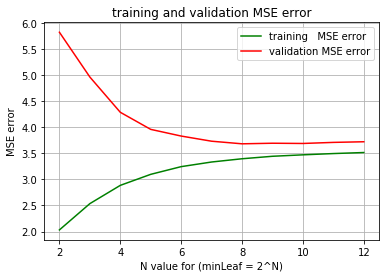

In [35]:
mse_train = []
mse_valid = []
x_axis = []
for i in range (2,13):
    x_axis.append(i)
    dtlearner = ml.dtree.treeRegress(Xtrain, Ytrain, maxDepth = 50, minLeaf = 2**i)
    #ytrainhat = dtlearner.predict(Xtrain) 
    mse_train.append( dtlearner.mse(Xtrain, Ytrain) )
        
    #yvalidhat = dtlearner.predict(Xvalid) 
    mse_valid.append( dtlearner.mse(Xvalid, Yvalid) )
    
plt.plot(x_axis, mse_train, 'g-', label='training   MSE error');
plt.plot(x_axis, mse_valid, 'r-', label='validation MSE error');
plt.xlabel("N value for (minLeaf = 2^N)")
plt.ylabel("MSE error")
plt.title('training and validation MSE error')
plt.grid(True)
plt.legend()

print ('training   MSE error:')
print( mse_train)

print ('validation MSE error:')
print (mse_valid)

### complexity increases when the minLeaf increasing.
### when minLeaf >= 2^10, the  model begins overfitting.
### minLeaf = 2^9 is best for complexity control

# 2. Random Forest

## find best number of features

Number of Features:  1
error_valid_list:
[3.7592239848808253, 3.7364464429734463, 3.715248709205965, 3.727996579292308, 3.724227682430151, 3.721942367227991, 3.7268217598032614, 3.7308742468149663, 3.7330236794532436]
Number of Features:  2
error_valid_list:
[3.7624642830456034, 3.7241075490196804, 3.7074802400930404, 3.7039044600055457, 3.697318878387104, 3.6988328286493823, 3.700557619559199, 3.695170826811626, 3.6955802969764124]
Number of Features:  3
error_valid_list:
[3.801225939246542, 3.6914646767943333, 3.693804258062686, 3.686070813475516, 3.6896474468764993, 3.684066570972529, 3.6844627328179893, 3.681238553831106, 3.680333818745912]
Number of Features:  4
error_valid_list:
[3.6811399512088063, 3.682950568853696, 3.6745263473356333, 3.679725807546198, 3.67981707054908, 3.6735482746383568, 3.674824885731939, 3.674283357314489, 3.6708383432406744]
Number of Features:  5
error_valid_list:
[3.7024913668747192, 3.6760694849160966, 3.6713256717905978, 3.666238385005346, 3.66269987

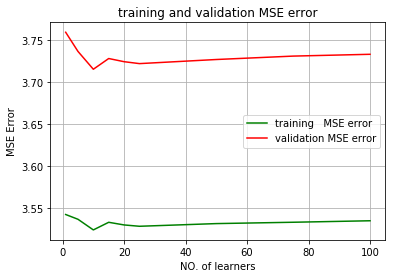

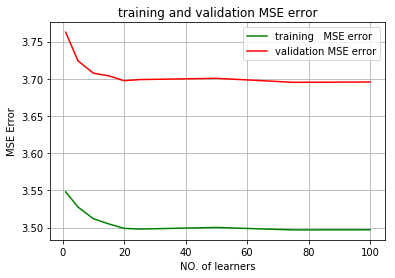

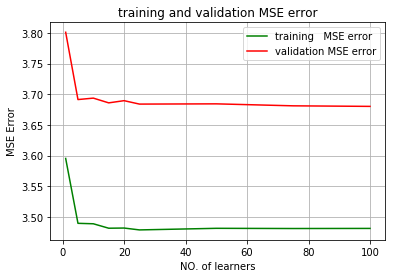

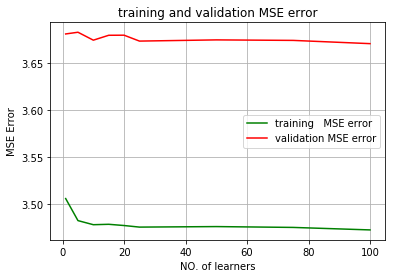

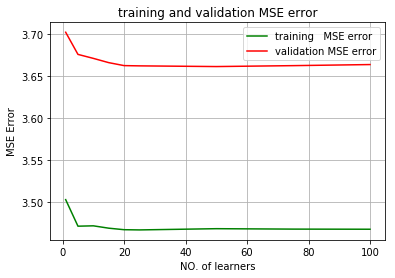

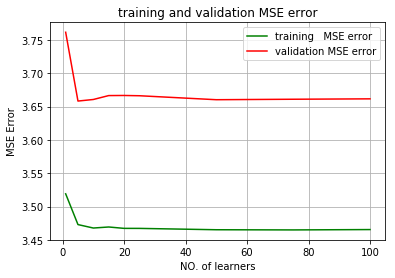

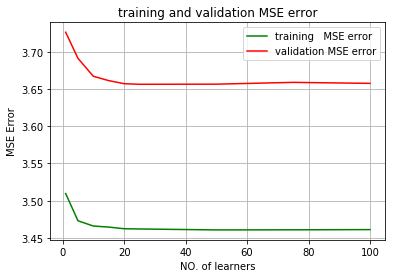

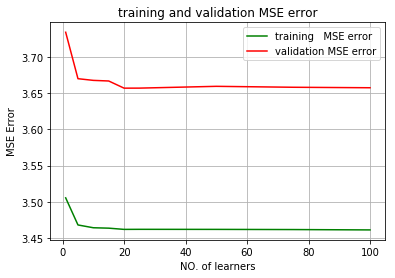

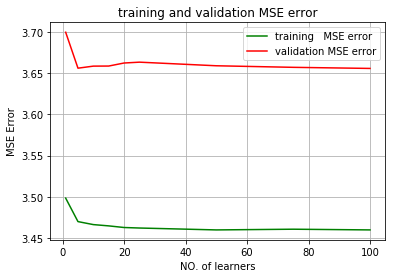

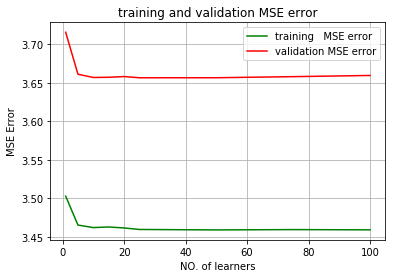

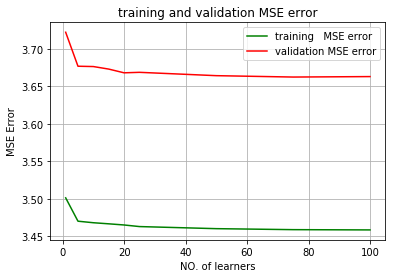

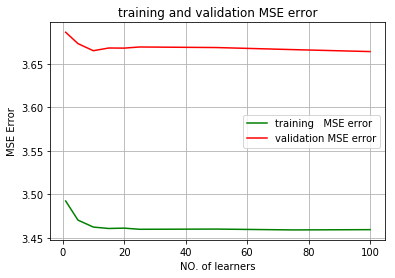

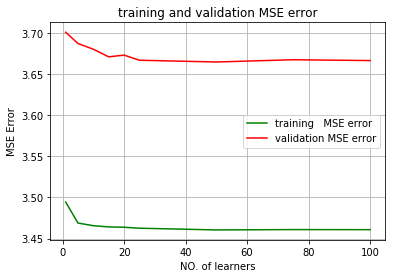

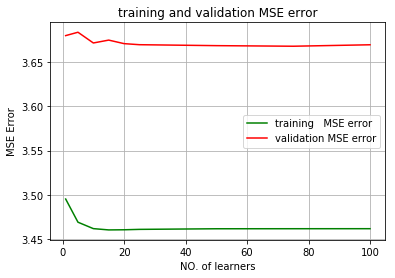

In [91]:
nBag = 100
ensemble = [None] * nBag
mt,nt = Xtrain.shape
mv,nv = Xvalid.shape
train_predict_list = np.zeros((mt, nBag))
valid_predict_list = np.zeros((mv, nBag))
learner_list = [1, 5, 10, 15, 20, 25, 50, 75, 100]
error_train_list = []
error_valid_list = []
feature_minimal_list_train = []
feature_minimal_list_valid = []
feature_minimal_list_X = []

for f in range(1,15):
    feature_minimal_list_X.append(f)
    error_train_list = []
    error_valid_list = []
    
    for i in range(nBag):
        Xi, Yi = ml.bootstrapData(Xtrain, Ytrain, n_boot=90000)
        ensemble[i] = ml.dtree.treeRegress(Xi, Yi, maxDepth = 4, minLeaf = 2**8, nFeatures = f)
        train_predict_list[:,i] = ensemble[i].predict(Xtrain)
        valid_predict_list[:,i] = ensemble[i].predict(Xvalid)

    for j in learner_list:
        Ytrainhat = np.mean(train_predict_list[:,0:j], axis=1)
        Yvalidhat = np.mean(valid_predict_list[:,0:j], axis=1)

        error_train_list.append( np.mean((Ytrainhat - Ytrain)**2) )
        error_valid_list.append( np.mean((Yvalidhat - Yvalid)**2) )

    plt.figure(f)
    plt.plot(learner_list, error_train_list, 'g-', label='training   MSE error')
    plt.plot(learner_list, error_valid_list, 'r-', label='validation MSE error')
    plt.xlabel('NO. of learners')
    plt.ylabel('MSE Error')
    plt.title('training and validation MSE error')
    plt.grid(True)
    plt.legend()
    
    feature_minimal_list_train.append(np.min(np.array(error_train_list)))
    feature_minimal_list_valid.append(np.min(np.array(error_valid_list)))
    
    print ('Number of Features: ', f)
    print ('error_valid_list:')
    print (error_valid_list)


## feature_minimal_list

feature_minimal_list: 
[3.729999780515686, 3.687493285179957, 3.675980770237025, 3.6677159232033247, 3.661992016857478, 3.658973669645406, 3.658132271545537, 3.6523308023543124, 3.6523726736172764, 3.6597335453172795, 3.6608844716995756, 3.6588020883483887, 3.662165280261012, 3.669309436679386]


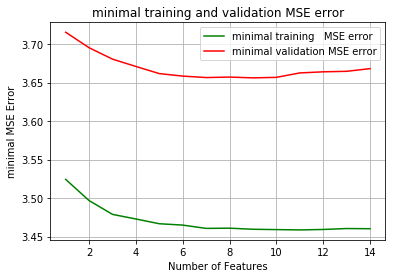

In [92]:
print ('feature_minimal_list: ')
print ( feature_minimal_list)

plt.plot(feature_minimal_list_X, feature_minimal_list_train, 'g-', label='minimal training   MSE error')
plt.plot(feature_minimal_list_X, feature_minimal_list_valid, 'r-', label='minimal validation MSE error')
plt.xlabel('Number of Features')
plt.ylabel('minimal MSE Error')
plt.title('minimal training and validation MSE error')
plt.grid(True)
plt.legend()

## maxDepth = 4, minLeaf = 2**8, nFeatures = 8

error_train_list:
[3.4821459666629786, 3.469203880783846, 3.463450953442588, 3.4601507655708845, 3.459163589651717, 3.4595605331091606, 3.461029517687486]
error_valid_list:
[3.691125354099992, 3.674296472415938, 3.6630550347307196, 3.657589427737336, 3.654096720697986, 3.6553857687074633, 3.6595000333299024]


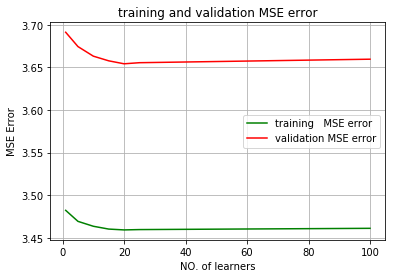

In [93]:
nBag = 100
ensemble = [None] * nBag
mt,nt = Xtrain.shape
mv,nv = Xvalid.shape
train_predict_list = np.zeros((mt, nBag))
valid_predict_list = np.zeros((mv, nBag))
learner_list = [1, 5, 10, 15, 20, 25, 100]
error_train_list = []
error_valid_list = []

for i in range(nBag):
    Xi, Yi = ml.bootstrapData(Xtrain, Ytrain, n_boot=90000)
    ensemble[i] = ml.dtree.treeRegress(Xi, Yi, maxDepth = 4, minLeaf = 2**8, nFeatures = 8)
    train_predict_list[:,i] = ensemble[i].predict(Xtrain)
    valid_predict_list[:,i] = ensemble[i].predict(Xvalid)

for j in learner_list:
    Ytrainhat = np.mean(train_predict_list[:,0:j], axis=1)
    Yvalidhat = np.mean(valid_predict_list[:,0:j], axis=1)
    
    error_train_list.append( np.mean((Ytrainhat - Ytrain)**2) )
    error_valid_list.append( np.mean((Yvalidhat - Yvalid)**2) )

    
plt.plot(learner_list, error_train_list, 'g-', label='training   MSE error')
plt.plot(learner_list, error_valid_list, 'r-', label='validation MSE error')
plt.xlabel('NO. of learners')
plt.ylabel('MSE Error')
plt.title('training and validation MSE error')
plt.grid(True)
plt.legend()

print ('error_train_list:')
print (error_train_list)

print ('error_valid_list:')
print (error_valid_list)

## 3. Make predictions on Xtext.txt

In [96]:
nBag = 20
ensemble = [None] * nBag
mtest, ntest = Xtest.shape
test_predict_list = np.zeros((mtest, nBag))

for i in range(nBag):
    Xi, Yi = ml.bootstrapData(Xtrain, Ytrain, n_boot=100000)
    ensemble[i] = ml.dtree.treeRegress(Xi, Yi, maxDepth = 4, minLeaf = 2**8, nFeatures = 8)
    test_predict_list[:,i] = ensemble[i].predict(Xtest)

Ytrainhat = np.mean(test_predict_list[:,0:100], axis=1)

## Genrate prediction file in CSV 

In [88]:
fh = open('predictionsRandomForest02.csv','w') # open file for upload
fh.write('ID,Prediction\n') # output header line
for i,yi in enumerate(Ytrainhat):
    fh.write('{},{}\n'.format(i,yi)) # output each prediction
fh.close() # close the file